#Basic median filter (2015.10.06 DW KT)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [6]:
%matplotlib inline

Testing the median filter with window length 16.

## programming and testing medianFilter()

In [7]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        tempret = np.zeros(len(data)-windowLength+1)  # creating an array where the filtered values will be saved in
        if windowLength % 2 ==0:                      # check if the window length is odd or even because with even window length we get an unsynchrone filtered wave 
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength +1 ] ) # write the values of the median filtered wave in tempret, calculate the median of all values in the window
            return tempret
        else:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength ] )
            return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

## programing and testing medianSinPlot()

In [8]:
def medianSinPlot( waveNumber, windowLength ):
    data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * waveNumber), (128 + windowLength / 2, ) )    #creating an array with a sine wave
    datafiltered = medianFilter(data, windowLength)  #calculate the filtered wave with the medianFiltered function
    data = data[ windowLength / 2 : - windowLength ] # slice the data array to synchronize both waves
    datafiltered = datafiltered[ : len(data) ]       # cut the filtered wave to the same length as the data wave
    plt.plot( data )
    plt.plot( datafiltered )
    plt.plot( data-datafiltered )     

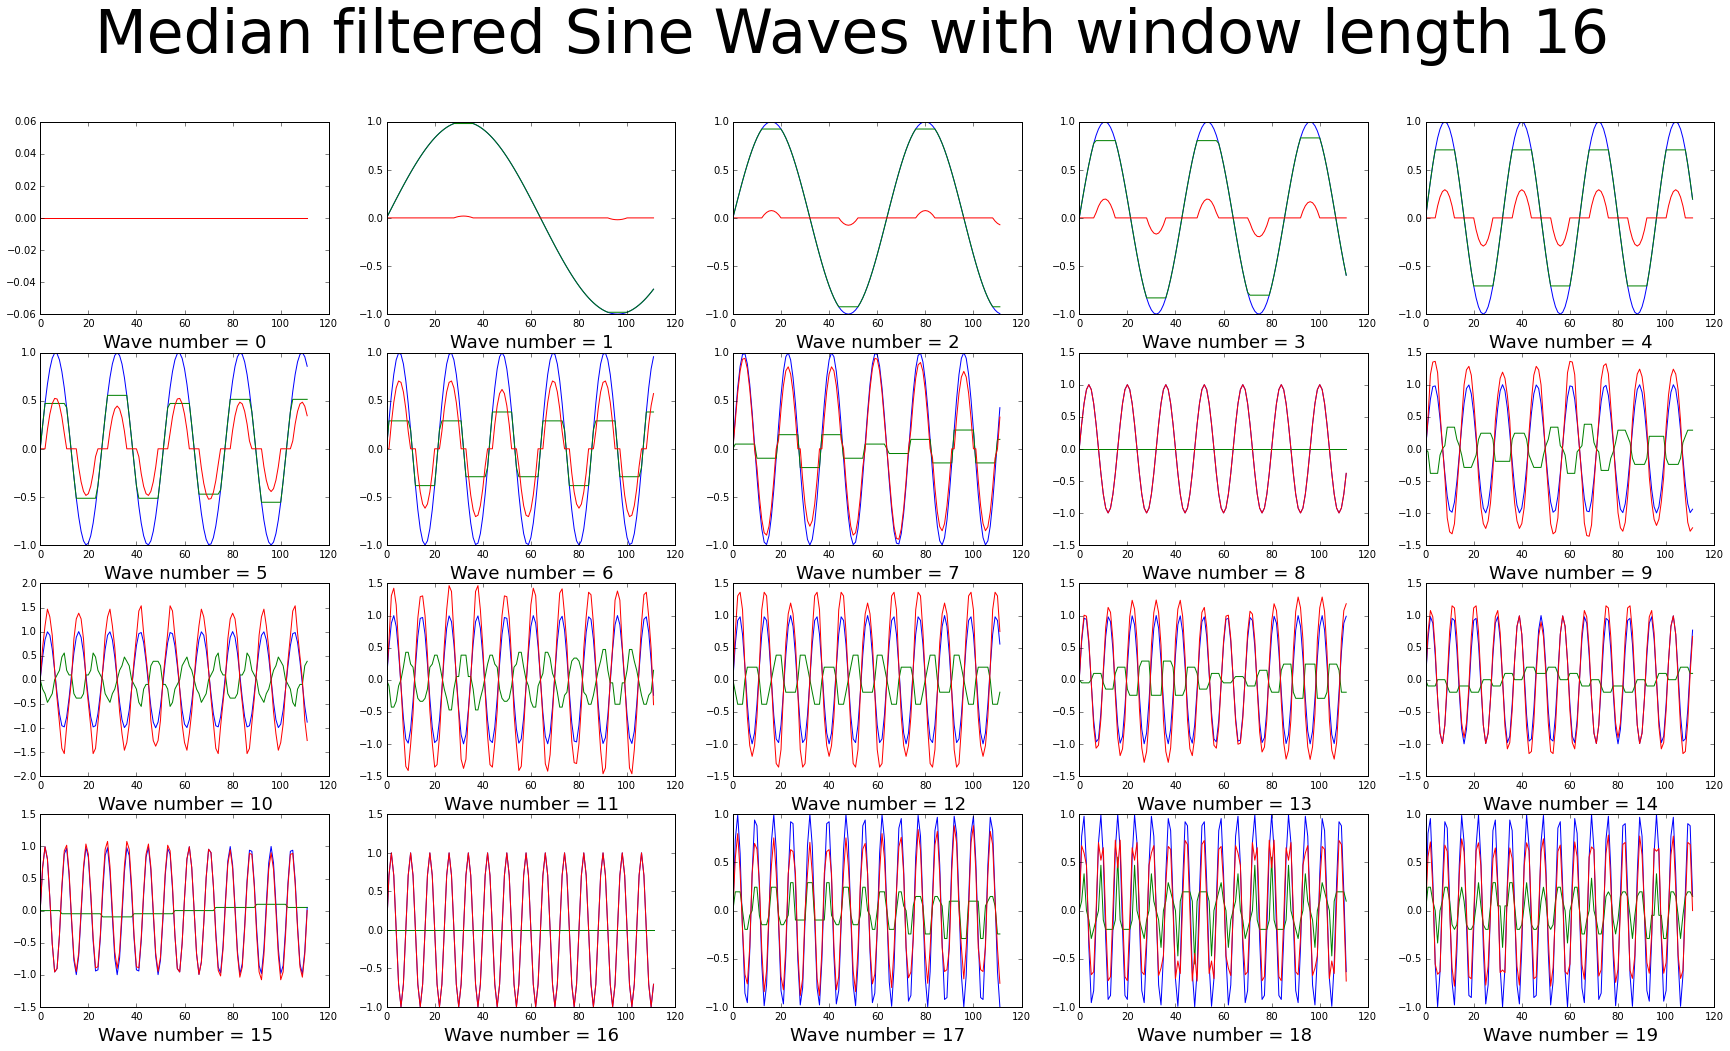

In [9]:
median = plt.figure(figsize=(30,20))
for x in range(1, 5):
    for y in range(1, 6):
        plt.subplot(5, 5, x + (y-1)*4)
        wavenum = (x-1) + (y-1)*4
        medianSinPlot( wavenum, 16 )
        plt.suptitle('Median filtered Sine Waves with window length 16', fontsize = 60)
        plt.xlabel(("Wave number = "+str((x-1) + (y-1)*4)), fontsize=18)

##Graphic Export

In [10]:
pp=PdfPages( 'median sin window length 16.pdf' )
pp.savefig( median )
pp.close()